# Aproximações de Números e Funções por Sequências e Séries

Os objetivos desta lição são

- Aprender sobre a representação números na máquina;
- Aprender sobre Aritmética de Ponto Flutuante;
- Identificar como lidar com sequências e séries em programação;
- Entender que elementos anteriores da sequência são substituídos;
- Tentar gastar o mínimo de elementos e variáveis (mantendo a clareza);
- Tomar cuidado com overflow e underflow;
- Relembrar/treinar a programação.

## Sequências

Uma sequência em matemática é um conjunto de valores ordenados:
$$ (a_1, a_2, a_3, \dots, a_n, \dots) $$

O índice $1$ usado no primeiro elemento é arbitrário, e serve para normalizar essa ordem.
Em alguns casos é mais interessante começar com o índice $0$.

Matematicamente, costumamos estar interessados na convergência dessa sequência. No entanto, podemos utilizar uma sequência por outros motivos. Computacionalmente, estamos interessados em **como obter os elementos de uma sequência, quando necessário.**

É importante ressaltar aqui a importância da frase **quando necessário**, pois como veremos a seguir, não é do nosso interesse calcular todos esses valores ao mesmo tempo, e quase sempre também não seria possível.

### Exemplo 1

Dado um objeto com aceleração constante de $10 m/s$ saindo do repouso, queremos calcular sua posição nos instantes
$t = 0, 0.1, 0.2, 0.3, \dots$.
Note que temos uma sequência $t_n = (n-1)/10$, e queremos uma sequência $x_n$ das posições.

Neste caso, porém, as leis de movimento nos dizem que
$$ x(t) = x_0 + v_0 t + \frac{1}{2}at^2, $$
que em nosso caso se reduz a
$$ x(t) = 5t^2. $$

Em outras palavras, a sequência $x_n$ pode ser calculada diretamente dado $t_n$, e $t_n$ também tem uma fórmula geral dado $n$,
$$ x_n = 5\bigg(\frac{n-1}{10}\bigg)^2 = \frac{(n-1)^2}{20}. $$
Desse modo, não é necessário guardar nada em especial, pois $x_n$ pode ser calculado diretamente a partir de $n$.

### Exemplo 2

Dado um número $x \in \mathbb{N}, x > 1$, queremos calcular a sequência de Collatz desse número.
Em particular, queremos calcular qual o primeiro elemento que é $1$ (se houver).

Aqui é importante ressaltar a conjectura de Collatz: Dado um número $a_1 \in \mathbb{N}$, e a fórmula recursiva
$$ a_{n+1} = \left\{\begin{array}{ll}
    a_n/2, & \mbox{se } a_n \mbox{ é par}; \\
    3a_n + 1, & \mbox{se } a_n \mbox{ é impar},
\end{array}\right. $$
sempre existe um elemento desta sequência tal que $a_n = 1$. A partir desse ponto a sequência perde a importância. Por exemplo, a sequência de Collatz de 3 é

$$ 3 \rightarrow 10 \rightarrow 5 \rightarrow 16 \rightarrow 8 \rightarrow 4 \rightarrow 2 \rightarrow 1 \rightarrow 4 \rightarrow 2 \rightarrow 1 \cdots $$

Nessa sequência, é necessário saber quem é o ponto atual, e é impossível saber um elemento arbitrário da sequência em casos gerais. Dessa maneira é preciso calcular elemento a elemento.

Lembre-se que para verificar a paridade de um número, utilizamos `%`.

In [1]:
15 % 2

1

In [2]:
14 % 2

0

In [3]:
15 % 2 == 0 # É par ?

false

In [4]:
14 % 2 == 0 # É par ?

true

Lembre-se também que para dividir um número e mantê-lo inteiro, usamos `div`.

In [5]:
div(15, 2)

7

In [6]:
div(14, 2)

7

In [7]:
14/2 # 7.0 e 7 são o mesmo valor, mas são diferentes em computação

7.0

Um **erro** comum de alunos inexperientes nesse caso é **tentar numerar todos os elementos**.

In [8]:
a1 = 3
if a1 % 2 == 0
    a2 = div(a1, 2)
else
    a2 = 3 * a1 + 1
end

10

In [9]:
if a2 % 2 == 0
    a3 = div(a2, 2)
else
    a3 = 3 * a2 + 1
end

5

Essa estratégia logo fica inviável. No entanto, note que precisamos apenas do valor atual da sequência, de maneira que podemos usar apenas uma mesma variável `a` que irá guardar sempre o valor mais atual.

In [10]:
a = 3

3

In [11]:
# Bloco 1
if a % 2 == 0
    a = div(a, 2)
else
    a = 3 * a + 1
end

10

In [12]:
a

10

Rodando mais de uma vez o Bloco 1, fazemos uma nova iteração da sequência.
Para deixar mais claro, vamos guardar também uma variável `n` que diz qual o índice da sequência.

In [13]:
a = 3
n = 1

1

In [14]:
# Bloco 2
if a % 2 == 0
    a = div(a, 2)
else
    a = 3 * a + 1
end
n = n + 1
println("a = $a, n = $n")

a = 10, n = 2


Note que `n` também pode ser usado para responder a pergunta original: quando `a` for 1, teremos o `n` marcando o índice correspondente.

Isso nos leva a um conceito importante. Note que sequências contém infinitos elementos. No entanto, computacionalmente, não podemos fazer contas infinitas. Isso constitui um **loop infinito**. Códigos com loops infinitos são considerados **"errados"** (no sentido de não fazerem o que se espera), então devemos evitá-los.
Portanto, o fato de percebermos que para resolver o problema, devemos fazer a conta do Bloco 2 até que `n` seja 1 é de extrema importância, pois isso evitará um loop infinito (dado que a conjectura de Collatz esteja correta).

Com isso, podemos definir um termo formal para este conjunto de código com um objetivo específico:

**Def. (Algoritmo):** Um algoritmo é uma coleção de instruções para realizar alguma tarefa específica. Segundo Knuth (The Art of Computer Programming, v.1), ele deve satisfazer as seguintes condições, parafraseadas aqui:
- **Finitude:** O algoritmo deve acabar em tempo finito;
- **Bem definido:** As intruções devem ser claras e sem ambiguidade;
- **Entrada:** O algoritmo tem zero ou mais entradas, que são valores determinados antes do algoritmo começar. Essas entradas são especificados a partir de conjuntos de objetos;
- **Saída:** O algoritmo tem uma ou mais saídas, que são quantidades relacionadas com as entradas;
- **Eficácia/Computabilidade:** As operações feitas no algoritmo devem ser suficientemente básicas para que a princípio possam ser executadas por uma pessoa num espaço finito e tempo finito com papel e caneta.

Podemos fazer uma prévia do nosso algoritmo:

In [15]:
#=
1. Entrada: x
2. Inicialização: a ← x, n ← 1.
3. Enquanto a > 1
    1. Se a é par,
        faça a ← a/2
    2. Caso contrário,
        faça a ← 3a + 1.
    3. Incremente n.
4. Saída: n.
=#

Nosso algoritmo para encontrar o primeiro elemento está quase feito. A entrada, saída, e todos os passos estão claros. Todos os passos são triviamente feitos com papel e caneta.
No entanto, temos alguns pequenos problemas:

- **E se a conjectura for falsa?**
Se a conjectura é verdadeira, o algoritmo para quando encontra `1`, que pela conjectura, existe. Mas se não existe, pode ser que tenhamos um loop infinito. Dessa maneira, iremos colocar uma **condição de parada** para a falha do algoritmo. Não existe uma regra para a condição de parada. Deve-se tomar cuidado, no entanto, para não excluir a possibilidade do algoritmo funcionar em muitos casos. Uma condição de parada possível neste caso é que `n` seja muito grande. Se, por exemplo, fizermos 1 milhão de iterações e não encontrarmos `a_n = 1`, então talvez ele não exista. Note que essa condição exclui algumas soluções de aparecerem, por exemplo
$$ a_1 = 2^{1.000.000}. $$
É fácil ver que $a_n = 2^{1.000.001 - n}$, de modo que para `n = 1.000.001` teremos $a_n = 1$.

Muitas vezes a condições de parada de falha é um limitante físico para deixar o algoritmo tratável. É muito fácil escolher um número `x` tal que nosso algoritmo leve horas para convergir. Não é do nosso interesse esperar tanto para um algoritmo recreativo. Poderíamos colocar uma condição de tempo então. Qual condição escolher é um assunto complicado, que depende de muitos outros fatores além da disciplina.
Em especial, a teoria matemática arredor do problema deve ser considerada. Imagine que a conjectura de Collatz é falsa, e que `x` é um valor finito tal que a sequência gerada com `a_1 = x` nunca decresça à `1`. *Como é possível verificar que `x` é um contra-exemplo para a conjectura?*

- **O maior inteiro.**
O computador é uma máquina física, com limitações impostas para que seja possível fazer contas determinísticas.
Dessa maneira, ele segue regras para definir números inteiros e "reais" (as aspas serão explicadas depois), e essas regras limitam o maior inteiro que pode ser representado por um tipo específico de dado.
Mais importante, esse valor é independente da linguagem. A saber, o tipo de inteiro básico do Julia é o `Int64`, de 64 bits, e cujo maior valor é $2^{63}-1 \approx 10^{18}$. Coisas estranhas acontecem se fizermos qualquer conta com esse valor, de modo que é imperativo não ultrapassá-lo. Veremos mais detalhes em breve, mais por enquanto, vamos colocar uma nova condição de parada no nosso código: se $a > 10^{17}$, também paramos.

In [16]:
#=
1. Entrada: x ∈ N
2. Inicialização: a ← x, n ← 1, a_bound = 10^17, n_bound = 1_000_000
3. Se a ≦ 0
    faça n ← 0
    termine o algoritmo
4. Enquanto a > 1
    1. Se a é par,
        faça a ← a/2
    2. Caso contrário,
        faça a ← 3a + 1.
    3. Incremente n.
    4. Se a > a_bound
        faça n ← -1 e termine o algoritmo
    5. Se n > n_bound
        faça n ← -2 e termine o algoritmo
5. Saída: n
    Se n > 0, então a_n = 1: Saída bem sucedida,
    Se n = 0, então x ≦ 0: Saída de erro na entrada,
    Se n = -1, então a ficou muito grande: Saída de valor muito grande,
    Se n = -2, então n ficou muito grande: Saída de muitas iterações.
=#

In [17]:
function collatz(a::Int; a_bound = 10^17, n_bound = 1_000_000) # O mesmo que começar com x e atribuir x à a.
    n = 1
    if a <= 0
        return 0
    end
    while a > 1
        if a % 2 == 0
            a = div(a, 2)
        else
            a = 3a + 1
        end
        n += 1
        if a > a_bound
            return -1
        elseif n > n_bound
            return -2
        end
    end
    return n
end

collatz (generic function with 1 method)

In [18]:
collatz(5)

6

In [19]:
collatz(2^30, n_bound=10)

-2

In [20]:
collatz(1)

1

In [21]:
collatz(10^17+2)

-1

## Representação de Inteiros na máquina

Como dito anteriormente, os computadores atuais guardam inteiros de maneiras bastante específicas.
Essas maneiras envolvem os bits de um computador, que matematicamente equivalem a números binários.
Um bit pode estar ligado ou desligado, ou seja, 1 ou 0. Um inteiro de $n$ bits terá $n$ posições ordenadas que podem estar ligadas ou desligadas. Dessa maneira, é possível representar até $2^n$ inteiros com $n$ bits.
A pergunta é quais $2^n$ inteiros?

Muitas vezes nos preocupamos apenas com os inteiros positivos, então uma escolha bastante simples seria os inteiros de $0$ à $2^n-1$. Esse tipo é dito "sem sinal" ou "Unsigned" em inglês. Em Julia, são os tipos `UIntN`, onde `N` é o número de bits (8, 16, 32, 64, 128).

Para inteiros positivos e negativos, uma maneira é guardar os númeos de $-2^{n-1}$ à $2^{n-1}-1$. Em binário, podemos escolher os $n-1$ bits da direita para fazer uma contagem de $0$ à $2^{n-1}-1$, e o bit mais à esquerda para indicar de começamos a contar de $-2^{n-1}$ ou de $0$.

### Exemplo com n = 3

| Bin | Dec |
|-----|-----|
| 000 |   0 |
| 001 |   1 |
| 010 |   2 |
| 011 |   3 |
| 100 |  -4 |
| 101 |  -3 |
| 110 |  -2 |
| 111 |  -1 |

Note que o problema de trabalhar com inteiros que caiam fora deste intervalo está nas operações básicas mesmo:

    3 + 1  (em decimal)
    
             1     1
     011    011    011    011
     001    001    001    001
    ----   ----   ----   ----
       ?      0     00    100

Mas `100` nessa representação significa `-4`, ou seja, a soma "dá a volta".

### Exemplo com n = 64 (o padrão)

O inteiro `Int64` vai de $-2^{63}$ à $2^{63}-1$.

In [22]:
x = 2^63-1

9223372036854775807

In [23]:
x + 1

-9223372036854775808

In [24]:
-x

-9223372036854775807

In [25]:
-x - 2

9223372036854775807

In [26]:
-(x+1) # = x + 1??

-9223372036854775808

In [27]:
x * x

1

In [28]:
y = 2^62

4611686018427387904

In [29]:
y * y

0

In [30]:
x * y

-4611686018427387904

Embora os valores máximos dos inteiros de 64 bits pareçam bastante grandes, eles podem ser alcançados com relativa facilidade.

In [31]:
factorial(20) * 21

-4249290049419214848

### BigInt

Apesar do limite dos inteiros, muitas vezes queremos utilizar valores inteiros absurdamente grandes. Para isso existem **implementações** de números inteiros grandes - BigInts, para encurtar - que permitem, a priori, qualquer número inteiro. É importante notar a diferença entre um BigInt e um inteiro nativo. O BigInt **sempre** vem de uma implementação, enquanto que o inteiro nativo "existe" no processador. Todas as contas com BigInt serão mais lentas que em inteiros nativos, então não podemos simplesmente usar BigInt para tudo.

In [32]:
log2(4 * 10^(18))

61.794705707972525

In [33]:
big"2"^300

2037035976334486086268445688409378161051468393665936250636140449354381299763336706183397376

In [34]:
factorial(big"30")

265252859812191058636308480000000

## Fibonacci

Vamos continuar nosso exemplo com mais uma sequência interessante, a de Fibonacci:

$$ F_1 = F_2 = 1 \qquad F_{n+1} = F_n + F_{n-1}. $$

A sequência de Fibonacci envolve dois termos, e cresce infinitamente. Existem vários motivos para se trabalhar com a série de Fibonacci, mas vamos utilizá-la recreativamente.
Vamos criar um simples algoritmo para calcular o n-ésimo termo da série de Fibonacci. Assuma, por enquanto, que todos os termos serão bem representados por inteiros de 64 bits.

In [35]:
#=
   Entrada: n inteiro
1. Se n ≦ 0
    retorne 0
2. Se n = 1 ou n = 2
    retorne 1
3. Inicialização: F1 ← 1, F2 ← 1, k ← 2
4. Enquanto k < n
    1. Fnovo ← F1 + F2  # Isso calcula o valor novo
    2. F1 ← F2 # O valor F2 passa a ser o mais antigo dos dois
    3. F2 ← Fnovo # O valor Fnovo passa a ser o anterior
    4. Incremente k
5. Retorne F2.
    Saída: 0 se a entrada estava incorreta,
           F_n caso contrário.
=#

In [36]:
function fibon(n)
    # Exercício: Implemente este código
end

fibon (generic function with 1 method)

In [37]:
for n = 1:20
    println("F_$n = $(fibon(n))")
end

F_1 = nothing
F_2 = nothing
F_3 = nothing
F_4 = nothing
F_5 = nothing
F_6 = nothing
F_7 = nothing
F_8 = nothing
F_9 = nothing
F_10 = nothing
F_11 = nothing
F_12 = nothing
F_13 = nothing
F_14 = nothing
F_15 = nothing
F_16 = nothing
F_17 = nothing
F_18 = nothing
F_19 = nothing
F_20 = nothing


É bastante simple calcular um elemento da sequência de Fibonacci, e é interessante que podemos explorar outra maneira de fazer isso.

### Recursão

In [38]:
function fat_por_recursao(n::Int)
    if n < 0
        error("BLAH")
    end
    if n == 0
        return 1
    end
    return n * fat_por_recursao(n - 1)
end

fat_por_recursao (generic function with 1 method)

In [39]:
fat_por_recursao(21)

-4249290049419214848

In [40]:
# operador ternário
# PROP ? Resultado se SIM : Resultado se NAO
5 > 30 ? "ok" : "oops"

"oops"

In [41]:
fat_uma_linha(n::Int) = n == 0 ? 1 : n * fat_uma_linha(n - 1)

fat_uma_linha (generic function with 1 method)

In [42]:
fat_uma_linha(5)

120

Recursão é uma das partes mais importantes no desenvolvimento de códigos. Muitas estratégias computacionais e matemáticas envolvem o chamado "dividir e conquistar" ou "reduzir para um caso conhecido". Em particular, demonstrações por indução finita fazem uma coisa parecida, onde você supõe saber resolver para um caso e consegue resolver um caso de nível superior reduzindo-o ao caso conhecido.

Computacionalmente, podemos pensar em recursão como a divisão de um problema em outros, cada um destes menor que o primeiro. Para cada problema menor, repetimos o processo. Como não podemos ter um loop infinito, é necessário terminar essa redução de alguma maneira. Essa maneira envolve, simplesmente, saber resolver alguns casos de problema menor (que garantam a convergência).

No caso de Fibonacci, o cálculo do n-ésimo termo é feito calculando os termos n-1 e n-2.
Os casos n-1 e n-2 são, de fato, menores. Além disso, repetindo este processo chegaremos a dois casos: n = 1 ou n = 2. Desse modo, temos

- casos pequenos que conseguimos resolver trivialmente;
- uma maneira de reduzir um problema em outros menores;
- garantia matemática que essa redução leva aos problemas menores que sabemos resolver.

Abaixo temos um pseudo-código.

In [43]:
#=
Rotina FIBO(n)
Entrada: n
1. Se n = 1 ou n = 2
    retorne 1
2. Senão,
    retorna FIBO(n-1) + FIBO(n-2)
=#

In [44]:
function FIBO(n)
    if n <= 2
        return min(1, max(n, 0)) # Pequeno truque
    else
        return FIBO(n-1) + FIBO(n-2)
    end
end

FIBO (generic function with 1 method)

In [45]:
FIBO(10)

55

In [46]:
for n = 1:20
    println("F_$n = $(FIBO(n))")
end

F_1 = 1
F_2 = 1
F_3 = 2
F_4 = 3
F_5 = 5
F_6 = 8
F_7 = 13
F_8 = 21
F_9 = 34
F_10 = 55
F_11 = 89
F_12 = 144
F_13 = 233
F_14 = 377
F_15 = 610
F_16 = 987
F_17 = 1597
F_18 = 2584
F_19 = 4181
F_20 = 6765


Muitas vezes, o código de recursão será mais curto.
Em particular, em Julia (e C) temos o chamado **operador ternário**, que nos permite fazer a pergunta `if ... else ... end` em uma única linha.
Desse modo, temos uma implementação curtíssima de Fibonacci:

In [47]:
F(n) = n <= 2 ? min(1, max(n, 0)) : F(n-1) + F(n-2)

F (generic function with 1 method)

In [48]:
for n = 1:20
    println("F_$n = $(F(n))")
end

F_1 = 1
F_2 = 1
F_3 = 2
F_4 = 3
F_5 = 5
F_6 = 8
F_7 = 13
F_8 = 21
F_9 = 34
F_10 = 55
F_11 = 89
F_12 = 144
F_13 = 233
F_14 = 377
F_15 = 610
F_16 = 987
F_17 = 1597
F_18 = 2584
F_19 = 4181
F_20 = 6765


No entanto, é importante ter cuidado ao utilizar recursão. O custo computacional fica escondido nas chamadas de função, e às vezes podemos deixar um código muito mais complicado do que deveria.
No caso de Fibonacci, por exemplo, ao calcular `F(n)`, pedimos o cálculo de `F(n-1)` e `F(n-2)`, mas o cálculo de `F(n-1)` irá pedir o cálculo de `F(n-2)` e `F(n-3)`, ou seja, `F(n-2)` será calculado duas vezes!

In [49]:
function FIBO_comprint(n)
    println("Chamada: F$n")
    if n <= 2
        return min(1, max(n, 0)) # Pequeno truque
    else
        return FIBO_comprint(n-1) + FIBO_comprint(n-2)
    end
end

FIBO_comprint (generic function with 1 method)

In [50]:
FIBO_comprint(5)

Chamada: F5
Chamada: F4
Chamada: F3
Chamada: F2
Chamada: F1
Chamada: F2
Chamada: F3
Chamada: F2
Chamada: F1


5

Em outras palavras, Fibonacci com recursão acaba sendo muito mais caro que Fibonacci usando `for` ou `while`. Tome cuidado com essas armadilhas.

**Leitura adicional:** Existe um conceito chamada "Avaliação preguiçosa", que consiste na avaliação dos valores somente quando são necessários. Em Julia, o pacote `Lazy.jl` implementa esse conceito. Se a avaliação de `F(n)` for feita de maneira preguiçosa, não haverá o custo adicional do cálculo de $F_n$ repetidos.

## Introdução à pontos flutuantes

Vamos voltar nossa atenção ao problema inicial de Fibonacci: calcular o n-ésimo termo. Nossas últimas discussões foram todas no sentido de como calcular os elementos de Fibonacci termo a termo ou recursivamente. Porém, matematicamente, o n-ésimo termo de Fibonacci é bem definido!

$$ F_n = \frac{\phi^n - \psi^n}{\sqrt{5}}, $$
onde $$\phi = \frac{1 + \sqrt{5}}{2}$$ e $$\psi = \frac{1 - \sqrt{5}}{2} = 1 - \phi. $$

Isso quer dizer que podemos calcular Fibonacci com uma fórmula direta.

In [51]:
phi = (1 + sqrt(5))/2
psi = 1 - phi
for n = 1:20
    Fn = (phi^n - psi^n)/sqrt(5)
    println("F_$n = $Fn")
end

F_1 = 1.0
F_2 = 1.0
F_3 = 2.0
F_4 = 3.0000000000000004
F_5 = 5.000000000000001
F_6 = 8.000000000000002
F_7 = 13.000000000000002
F_8 = 21.000000000000004
F_9 = 34.00000000000001
F_10 = 55.000000000000014
F_11 = 89.00000000000003
F_12 = 144.00000000000006
F_13 = 233.00000000000006
F_14 = 377.00000000000017
F_15 = 610.0000000000003
F_16 = 987.0000000000005
F_17 = 1597.000000000001
F_18 = 2584.000000000002
F_19 = 4181.000000000003
F_20 = 6765.000000000005


Perceba que o problema aqui agora é outro. Os valores não estão mais "corretos". Na verdade, quase todos contém um pequeno **erro**.

Quão pequeno?

In [52]:
phi = (1 + sqrt(5))/2
psi = 1 - phi
F1 = F2 = 1
Fnovo = 1
for n = 3:93
    Fn = (phi^n - psi^n)/sqrt(5)
    Fnovo = F1 + F2
    F2 = F1
    F1 = Fnovo
    println("F_$n = $Fnovo, Diferença F_$n = $(Fn - Fnovo)")
end

F_3 = 2, Diferença F_3 = 0.0
F_4 = 3, Diferença F_4 = 4.440892098500626e-16
F_5 = 5, Diferença F_5 = 8.881784197001252e-16
F_6 = 8, Diferença F_6 = 1.7763568394002505e-15
F_7 = 13, Diferença F_7 = 1.7763568394002505e-15
F_8 = 21, Diferença F_8 = 3.552713678800501e-15
F_9 = 34, Diferença F_9 = 7.105427357601002e-15
F_10 = 55, Diferença F_10 = 1.4210854715202004e-14
F_11 = 89, Diferença F_11 = 2.842170943040401e-14
F_12 = 144, Diferença F_12 = 5.684341886080802e-14
F_13 = 233, Diferença F_13 = 5.684341886080802e-14
F_14 = 377, Diferença F_14 = 1.7053025658242404e-13
F_15 = 610, Diferença F_15 = 3.410605131648481e-13
F_16 = 987, Diferença F_16 = 4.547473508864641e-13
F_17 = 1597, Diferença F_17 = 9.094947017729282e-13
F_18 = 2584, Diferença F_18 = 1.8189894035458565e-12
F_19 = 4181, Diferença F_19 = 2.7284841053187847e-12
F_20 = 6765, Diferença F_20 = 4.547473508864641e-12
F_21 = 10946, Diferença F_21 = 7.275957614183426e-12
F_22 = 17711, Diferença F_22 = 1.0913936421275139e-11
F_23 = 286

Impressionantemente, esse erro não é tão pequeno assim. Ele cresce com o tamanho de `n`, de modo que essa aproximação é inviável para valores grandes de `n`.

O problema aqui, novamente, é que o computador armazena um valor "real" utilizando uma quantidade finita de bits.
O padrão IEEE 754 é o mais utilizado atualmente, e dita vários detalhes, do que é chamado de **ponto flutuante**.

Um número em ponto flutuante é da forma

$$ \mbox{mantissa} \times \mbox{base}^\mbox{expoente}, $$
onde a mantissa é um número real com módulo menor que 10, cujo dígito das unidades é não-nulo.

### Exemplos

$$ 234 = 2.34 \times 10^2 $$

$$ -12.5 = -1.25 \times 10^1 $$

$$ 0.001 = 1 \times 10^{-3} $$

$$ (101)_2 = (1.01)_2 \times 2^2. $$

In [53]:
bits(Float16(5))

"0100010100000000"

In [54]:
bits(Float16(6))

"0100011000000000"

Note que teremos limitações para a mantissa e expoente. Em particular, na base 10, pensaremos que a mantissa tem uma limitação no número de dígitos depois da vírgula, e o expoente estará limitada entre valores $L$ e $U$ como $L \leq E \leq U$.
Note que isso implica que existem valores máximos e mínimos.

Por exemplo, com 3 dígitos depois da vírgula e um expoente limitado por $-5 \leq E \leq 4$, o máximo será
$$ X_{\max} = 9.999 \times 10^4 = 9.999, $$
o menor número positivo será
$$ X_{\min} = 1.000 \times 10^{-5} = 0.00001. $$

In [55]:
nextfloat(Float16(0.0))

Float16(6.0e-8)

A base tradicionalmente é 2 nos computadores, e os bits atribuídos a um número desses é separado em uma parte para a mantissa e outra para o expoente. Em particular, com 64 bits, usamos 53 dígitos para a mantissa e 11 para o expoente.
Um dos bits da mantissa guarda o sinal do elemento.

Além do armazenamento, também é importante definir a **aritmética de ponto flutuante**.

Dado dois números armazenados na mesma base, a operação de soma ou subtração entre os dois ocorre da seguinte forma:

In [56]:
0.1 + 0.2 - 0.3

5.551115123125783e-17

In [57]:
#=
    Entrada: dois numeros x₁ = M₁×βᴱ¹ e x₂ = M₂×βᴱ².
1. Calcule o maior expoente E = max(E₁, E₂)
2. Escreva os dois números usando este expoente
    x₁ = (M₁ × βᴱ¹⁻ᴱ) × βᴱ
    x₂ = (M₂ × βᴱ²⁻ᴱ) × βᴱ
3. Some os dois
    x₃ = x₁ + x₂ = (M₁ × βᴱ¹⁻ᴱ + M₂ × βᴱ²⁻ᴱ) × βᴱ
4. Calcule a mantissa M₃ e expoente E₃ do número novo
    x₃ = M₃×βᴱ³
=#

Observe, no entanto, que como a mantissa e o expoente são guardados usando uma quantidade finita de bits, então podemos acabar perdendo informação.

Vamos fazer uma simulação dessa operação uma mantissa de 3 dígitos além da vírgula, e um expoente com limitantes $-5 \leq E \leq 4$, na base 10.

In [58]:
#=
    34.12  +  8.256

    3.412 × 10¹ + 8.256 × 10⁰
    3.412 × 10¹ + 0.8256 × 10¹
    (3.412 + 0.8256) × 10¹
    4.2376 × 10¹
    4.238 × 10¹ # Armazenado
    42.38
=#

Essa perda de dígitos é chamado de **erro de arredondamento**.

Em alguns casos, esse erro pode fazer com que um dos números somados seja tratado como zero.

In [59]:
#=
    2351 + 0.01234

    2.351 × 10³ + 1.234 × 10⁻²
    2.351 × 10³ + 0.00001234 × 10³
    (2.351 + 0.00001234) × 10³
    2.35101234 × 10³
    2.351 × 10³ # Armazenado
    2351
=#

No armazenamento IEEE754, é um pouco mais complicado chegar nos valores máximos e mínimos, mas eles ainda existem.
Em particular, podemos usar o código abaixo para calcular qual o menor número positivo que é tratado como 0 quando somado à 1.

In [60]:
ϵ = 1.0
while 1.0 + ϵ > 1.0
    ϵ = ϵ/2
end
ϵ = 2ϵ

2.220446049250313e-16

In [61]:
eps(Float16)

Float16(0.000977)

Esse número é chamado de **precisão da máquina**, e às vezes denotado por $\epsilon_{\mbox{machine}}$.
Para todo número real $x$, existe um número $x'$ em ponto flutuante tal que
$$ |x - x'| \leq \epsilon_{\mbox{machine}}|x|. $$

In [62]:
eps(0.1)

1.3877787807814457e-17

In [63]:
10^10^10.0

Inf

In [64]:
Inf * 2 + Inf^2 - Inf

NaN

A multiplicação é mais simples. Os expoentes são somados, as mantissas multiplicadas, e os valores são arredondados e ajustados de modo a ficar na forma de ponto flutuante. Análogo para divisão.

Nos pontos flutuantes de 64 bits (`Float64` no Julia), o maior valor representável nessa base é por volta de $10^{308}$ e o menor positivo é $5\times10^{-324}$. Diferente do que acontece com inteiros, quando fazemos alguma coisa que ultrapassa o maior valor, nós temos o chamado **overflow**. Denotaremos o número como $\infty$ (infinito), ou `Inf` em Julia. Se algum cálculo resultar em um valor positivo que o menor valor positivo, obtemos um chamado **underflow**, e o valor é considerado 0.

Alguns cálculos resultam em `Inf` e 0 também, pelo padrão da IEEE754: $1/0 = \infty$, $1/\infty = 0$, $-1/0 = -\infty$, etc.

Outro ponto importante é que algumas operações não estão bem definidas, mas elas tem uma representação.
Por exemplo, as operações $\infty - \infty$, $0/0$, $\infty/\infty$ e $0 * \infty$ são todas indeterminadas, e resultam no chamado **Not a Number** (Não é um número), denotado por `NaN`.

In [65]:
Inf - Inf

NaN

Denotamos por $\mbox{fl}(x)$ o número em ponto flutuante mais próximo do real $x$. Temos que para cada $x \in \mathbb{R}$, existe $\epsilon$ tal que $|\epsilon| \leq \epsilon_{\mbox{machine}}$ e $\mbox{fl}(x) = x(1+\epsilon)$.

Podemos agora falar sobre as aspas na palavra "real". Como vimos até aqui, os números de ponto flutuante expressam uma quantidade finita de valores. E mais, todos esses valores tem uma forma específica e racional. Então, no computador, utilizamos normalmente um subconjunto dos números racionais. Isso quer dizer que qualquer número irracional representado dessa forma será aproximado. Além disso, alguns números racionais também serão arredondados. O caso mais interessante, na minha opinião, é da seguinte soma:

In [66]:
0.1 + 0.2 - 0.3

5.551115123125783e-17

In [67]:
0.125 + 0.250 - 0.375

0.0

0.1 em binário não é uma dízima finita, então é aproximado. O mesmo vale para 0.2 e 0.3. Omitindo os detalhes, não obtemos 0.

Ainda mais interessante, a soma não é associativa.

In [68]:
(1.0 + 1e-16) + 1e-16 == 1.0 + (1e-16 + 1e-16)

false

In [69]:
((1.0 + 1e-16) + 1e-16) + 1

2.0

In [70]:
1.0 + (1e-16 + 1e-16)

1.0000000000000002

In [71]:
bits(1.0)

"0011111111110000000000000000000000000000000000000000000000000000"

In [72]:
bits(0.9)

"0011111111101100110011001100110011001100110011001100110011001101"

In [73]:
bits(1 - 0.9)

"0011111110111001100110011001100110011001100110011001100110011000"

In [74]:
bits(0.1)

"0011111110111001100110011001100110011001100110011001100110011010"

Por isso é bastante importante ter noção dos erros que estão acontecendo, para pensar na melhor maneira de se fazer certos cálculos.

### Voltando no Fibonacci

A fórmula para o n-ésimo número de Fibonacci é
$$ F_n = \frac{\phi^n - \psi^n}{\sqrt{5}}. $$

Acontece que $\phi > 1$ e $0 < \psi < 1$, então a distância entre $\phi^n$ e $\psi^n$ cresce bastante com $n$.
Além disso, ambos são irracionais, então seus valores já são aproximados. Neste caso, é mais simples calcular os números de Fibonacci utilizando `for` ou `while` com inteiros.
Claro que isso também vai depender do motivo para se calcular esses números.

## Precisão Arbitrária

Da mesma maneira que às vezes queremos trabalhar com inteiros maiores que o máximo da máquina, às vezes também estamos interessados em pontos flutuantes com mais precisão que os da máquina. Em Julia, são chamados de `BigFloat`.

In [75]:
BigFloat("1.0")

1.000000000000000000000000000000000000000000000000000000000000000000000000000000

In [76]:
big"0.1" + big"0.2" - big"0.3"

0.000000000000000000000000000000000000000000000000000000000000000000000000000000

In [77]:
eps(big"0.1")

1.079521069386805578173293982850049946389500045554535173127962933771073975395303e-78

In [78]:
sqrt(2.0)^2 - 2.0

4.440892098500626e-16

In [79]:
sqrt(big"2.0")^2 - big"2.0"

-1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77

In [80]:
nextfloat(big"0.0") # Menor positivo

8.50969131174083613912978790962048280567755996982969624908264897850135431080301e-1388255822130839284

Diferente dos `BigInt`s, os `BigFloat`s não crescem automaticamente. Devemos usar a função abaixo para escolher a precisão do mesmo.

In [81]:
setprecision(512)

512

In [82]:
nextfloat(big"0.0") # Menor positivo

8.50969131174083613912978790962048280567755996982969624908264897850135431080301037712781653863533176207041307677719465625590261564333325371457454023316728047e-1388255822130839284

In [83]:
BigFloat(pi)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848115

# Aproximações de Séries

Vamos para um assunto levemente diferente. Uma série é uma soma de infinitos termos numa ordem dada.
$$ S = \sum_{k = 1}^{\infty} a_k. $$
A questão aqui é, em geral, se essa soma existe ou não. Para tanto, define-se uma sequência $(s_1,s_2,\dots,s_n,\dots)$ dada por
$$ s_n = \sum_{k = 1}^n a_k. $$

Se essa sequência convergence, então essa série converge.

Computacionalmente, em geral, estamos mais preocupados em calcular essa soma. Um resultado básico de série diz que para que a série convirja, é necessário que $a_k \rightarrow 0$. Como já vimos, isso irá nos causar alguns problemas, dado que
$$ s_{n+1} = s_n + a_{n+1}, $$
e $a_{n+1}$ vai eventualmente ser muito pequeno.

Matematicamente, muitas vezes temos um objetivo, como calcular $\pi$, que pode ser obtido pelo cálculo de uma série. Devemos nos preocupar em como fazer isso de uma maneira computacional eficiente que não perca muita precisão. Frequentemente, teremos limites computacionais para essa eficiência, e aí devemos voltar à matemática para conseguir alguma maneira melhor de resolver o problema inicial.

## Expansão de Taylor

Como deve ter sido visto no curso de Cálculo, uma função continuamente diferenciável até ordem $n$ admite uma aproximação polinomial em torno de um ponto $a$ de seu domínio dada por
$$ P_n(x) = f(a) + f'(a)(x-a) + \frac{1}{2}f''(a)(x-a)^2 + \frac{1}{3!}f'''(a)(x-a)^3 + \dots + \frac{1}{n!}f^{(n)}(a)(x-a)^n. $$

Esse polinômio é chamado polinômio de Taylor de ordem $n$ em torno do ponto $a$, e existem alguns teoremas indicando o quão boa é essa aproximação.

**Teorema:** Se $f$ é continuamente diferenciável até ordem $n$ no ponto $a$, então
$$ f(x) = P_n(x) + r_n(x), $$
onde
$$ \lim_{x \rightarrow a} \frac{ r_n(x) }{ |x - a|^n } = 0. $$

**Teorema:** Se $f$ é continuamente diferenciável até ordem $n+1$ no intervalo fechado de $a$ à $x$, então
$$ f(x) = P_n(x) + \int_a^x \frac{f^{(n+1)}(t)}{n!}(x-t)^n \mbox{d} t. $$

**Teorema:** Se $f$ é continuamente diferenciável até ordem $n+1$ num intervalo aberto contento $a$ e $f^{(n)}$ é contínua no intervalo fechado de $a$ à $x$, então
$$ f(x) = P_n(x) + \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - a)^{n + 1}, $$
onde $\xi$ é um número real entre $a$ e $x$.

Podemos usar o conceito da expansão de Taylor para calcular numericamente alguns valores de funções não polinomiais. O caso mais comum é o da função $\exp(x) = e^x$, onde $e$ é o número de Euler.

In [84]:
e

e = 2.7182818284590...

*Aviso: A função exponencial já costuma estar implementada em baixo nível, no entanto faremos este estudo por questões didáticas.*

A função $e^x$ tem a seguinte expansão de Taylor em torno do ponto $0$.
$$ e^x = 1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \frac{x^4}{4!} + \dots + \frac{x^n}{n!} + \dots. $$

Então é bastante simples definir um algoritmo que calcule a aproximação da exponecial dado $x$ e $n$.

In [85]:
#=
    Entrada: x e n ≧ 0
1. Inicialização: E ← 1.0
2. Para k de 1 à n
    1. E ← E + x^k/k!
3. Retorne E
    Saída: E ≈ eˣ com n termos da expansão de Taylor
=#

In [86]:
E = 1.0
E += 1.0   # k = 1
E += 0.5   # k = 2
E += 1/6   # k = 3
E += 1/24  # k = 4
E += 1/120 # k = 5

2.7166666666666663

In [87]:
e - E

0.0016151617923787498

In [88]:
function exponencial(x, n)
    # Exercício. Usa a função factorial(n) para calcular n!
end

exponencial (generic function with 1 method)

Vamos testar nossa função contra `exp`, calculando o erro dessa aproximação.
No entanto, note que a função exponencial cresce rapidamente, e como vimos, a precisão de um valor é relativo ao valor. Sendo assim, vamos utilizar o **erro relativo** na nossa comparação.

**Definição:** O erro cometido ao se aproximar $x$ por $x'$ é $x - x'$.

**Definição:** O **erro absoluto** cometido ao se aproximar $x$ por $x'$ é $|x - x'|$.

**Definição:** O **erro relativo** cometido ao se aproximar $x$ por $x'$ é $\dfrac{|x - x'|}{|x|}$.

In [89]:
using Plots
pyplot(size=(400,300))

  likely near In[89]:68


Plots.PyPlotBackend()

In [90]:
N = collect(1:20)
Erro = [abs(exponencial(1.0, n) - exp(1.0))/exp(1.0) for n in N]
scatter(N, Erro, yaxis=:log)

LoadError: [91mMethodError: no method matching -(::Void, ::Float64)[0m
Closest candidates are:
  -([91m::Float64[39m, ::Float64) at float.jl:377
  -([91m::Complex{Bool}[39m, ::Real) at complex.jl:253
  -([91m::BigFloat[39m, ::Union{Float16, Float32, Float64}) at mpfr.jl:351
  ...[39m

Note que após $n = 17$, o erro é sempre a precisão da máquina. Isso quer dizer que os termos $a_n$ com $n > 17$ não afetam a soma, computacionalmente.

In [91]:
Erro = [abs(exponencial(5.0, n) - exp(5.0))/exp(5.0) for n in N]
scatter(N, Erro, yaxis=:log)

LoadError: [91mMethodError: no method matching -(::Void, ::Float64)[0m
Closest candidates are:
  -([91m::Float64[39m, ::Float64) at float.jl:377
  -([91m::Complex{Bool}[39m, ::Real) at complex.jl:253
  -([91m::BigFloat[39m, ::Union{Float16, Float32, Float64}) at mpfr.jl:351
  ...[39m

Veja que é erro é muito maior para $x = 5$ do que para $x = 1$. Isso acontece porque os termos além de $n > 20$  ainda são importantes para a aproximação de $e^5$.
A primeira vista, uma simples solução seria utilizar $n > 20$, mas veja o que acontece com nossa implementação.

Se você se lembra bem, isso acontece porque para $21!$ é maior que o máximo dos inteiros de 64 bits. Isso quer dizer que para calcular $e^x$ corretamente, devemos dar mais atenção aos detalhes do algoritmo.
Note também que $x^n$ pode acabar ficando muito grande para $x$ e $n$ grandes e causar overflow também.

Revisitando nossa soma:
$$ s_n = 1 + x + \frac{x^2}{2} + \dots + \frac{x^n}{n!}, $$
de modo que
$$ s_n = s_{n-1} + \frac{x^n}{n!}. $$
O termo à direita da soma não pode ser calculado diretamente pois cada termo da fração pode "explodir" (termo que utilizarei para dizer causar overflow). No entanto, o resultado da fração é bem comportado, então podemos tentar chegar nesse valor de outra maneira.

Veja que
$$ \frac{x^n}{n!} = \frac{x\times x\times x\times\dots\times x}{1\times2\times3\times\dots\times n}
= \frac{x}{1}\times\frac{x}{2}\times\frac{x}{3}\times\dots\times\frac{x}{n},
$$
então podemos fazer esse cálculo seguindo essa ordem, de maneira que o produto todo ficará equilibrado.

No entanto, é possível deixar esse produto mais eficiente. Note que se chamarmos $t_n = \dfrac{x^n}{n!}$, então

$$ s_n = s_{n-1} + t_n, $$
e
$$ t_n = t_{n-1}\times\frac{x}{n}. $$

Em outras palavras, a sequência que é somada também pode ser calculada utilizando o termo anterior. Cada iteração fará então apenas um produto, uma divisão, e uma soma.

In [92]:
#=
    Entrada: x e n ≧ 0
1. Inicialização: E ← 1.0, t ← 1.0
2. Para k de 1 à n
    1. t ← t * x / k
    2. E ← E + t
3. Retorne E
    Saída: E ≈ eˣ com n termos da expansão de Taylor
=#

In [93]:
function exponencial2(x, n)
    # Implemente
end

exponencial2 (generic function with 1 method)

In [94]:
N = collect(1:50)
Erro = [abs(exponencial2(5.0, n) - exp(5.0))/exp(5.0) for n in N]
Erro[find(Erro .== 0.0)] = eps()
scatter(N, abs.(Erro), yaxis=:log)

LoadError: [91mMethodError: no method matching -(::Void, ::Float64)[0m
Closest candidates are:
  -([91m::Float64[39m, ::Float64) at float.jl:377
  -([91m::Complex{Bool}[39m, ::Real) at complex.jl:253
  -([91m::BigFloat[39m, ::Union{Float16, Float32, Float64}) at mpfr.jl:351
  ...[39m

In [95]:
N = collect(1:50)
Erro = [abs(exponencial2(10.0, n) - exp(10.0))/exp(10.0) for n in N]
Erro[find(Erro .== 0.0)] = eps()
scatter(N, Erro, yaxis=:log)
ylims!(eps()/2, 1.0)

LoadError: [91mMethodError: no method matching -(::Void, ::Float64)[0m
Closest candidates are:
  -([91m::Float64[39m, ::Float64) at float.jl:377
  -([91m::Complex{Bool}[39m, ::Real) at complex.jl:253
  -([91m::BigFloat[39m, ::Union{Float16, Float32, Float64}) at mpfr.jl:351
  ...[39m

Perceba agora que a função `exp` não recebe um $n$ específico. A quantidade de termos calculados é específico para o valor $x$. Para $x = 0$, $n = 0$ basta, para $x = 1$, $n = 17$ basta, para $x = 10$, $n = 45$ foi necessário.

Em particular, como estamos fazendo uma atualização do tipo $s_n = s_{n-1} + t_n$ e $t_n$ tende a 0, podemos verificar se obtivemos um erro de arredondamento na soma, de modo que os termos seguintes também não acrescentarão nada.

In [96]:
#=
    Entrada: x
1. Inicialização: E ← 1.0, t ← x, k ← 1
2. Enquanto E + t ≠ E
    1. E ← E + t
    2. Incremente k
    3. t ← t * x / k
3. Retorne E
    Saída: E ≈ eˣ
=#

In [97]:
function exponencial3(x)
    # Implemente
end

exponencial3 (generic function with 1 method)

In [98]:
plot(x->exp(x) - exponencial3(x), 0, 10.0)

LoadError: [91mMethodError: no method matching -(::Float64, ::Void)[0m
Closest candidates are:
  -(::Float64, [91m::Float64[39m) at float.jl:377
  -(::Float64) at float.jl:367
  -([91m::PyCall.PyObject[39m, ::Any) at /home/abel/.julia/v0.6/PyCall/src/pyoperators.jl:11
  ...[39m

In [99]:
plot(x->abs(exp(x) - exponencial3(x))/exp(x), 0, 10.0)

LoadError: [91mMethodError: no method matching -(::Float64, ::Void)[0m
Closest candidates are:
  -(::Float64, [91m::Float64[39m) at float.jl:377
  -(::Float64) at float.jl:367
  -([91m::PyCall.PyObject[39m, ::Any) at /home/abel/.julia/v0.6/PyCall/src/pyoperators.jl:11
  ...[39m

Por fim, vejamos o que acontece com $x < 0$.

In [100]:
plot(x->abs(exp(x) - exponencial3(x))/exp(x), -10.0, 10.0)

LoadError: [91mMethodError: no method matching -(::Float64, ::Void)[0m
Closest candidates are:
  -(::Float64, [91m::Float64[39m) at float.jl:377
  -(::Float64) at float.jl:367
  -([91m::PyCall.PyObject[39m, ::Any) at /home/abel/.julia/v0.6/PyCall/src/pyoperators.jl:11
  ...[39m

O erro cresce novamente. Isso acontece porque o termo $t_n$ fica alternando de sinal, e fica pequeno antes de contribuir o suficiente para fazer a diferença necessária.
Uma maneira de remediar esse problema é usar a relação $e^x = \dfrac{1}{e^{-x}}$.

In [101]:
function exponencial4(x)
    if x < 0
        return 1.0/exponencial4(-x)
    end
    # Implemente
end

exponencial4 (generic function with 1 method)

In [102]:
plot(x->abs(exp(x) - exponencial4(x))/exp(x), -10.0, 10.0)

LoadError: [91mMethodError: no method matching /(::Float64, ::Void)[0m
Closest candidates are:
  /(::Float64, [91m::Float64[39m) at float.jl:381
  /([91m::PyCall.PyObject[39m, ::Any) at /home/abel/.julia/v0.6/PyCall/src/pyoperators.jl:11
  /(::R<:Real, [91m::S<:Complex[39m) where {R<:Real, S<:Complex} at complex.jl:278
  ...[39m

## Cálculo de $\pi$

Um tópico bastante interessante de computação matemática é o cálculo do valor de $\pi$. O interesse no cálculo de $\pi$ é antigo, e existem várias maneiras de fazê-lo. Além disso, a busca pelo valor de $\pi$ com a maior quantidade de dígitos corretos é uma disputa matemática bastante acirrada.

Das maneiras de calcular $\pi$, uma das mais interessantes, em minha opinião, é através da identidade
$$ \arctan 1 = \frac{\pi}{4} \qquad \Rightarrow \qquad \pi = 4 \arctan 1. $$

Agora, utilizamos a derivada de $\arctan$:
$$ \frac{\mbox{d}}{\mbox{d}x}\arctan x = \frac{1}{1+x^2}, $$
e a expansão da fração para $|x| < 1$:
$$ \frac{1}{1+x^2} = 1 - x^2 + x^4 - x^6 + \dots + (-1)^n x^{2n} + \dots. $$

Integrando, temos
$$ \arctan x = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + \dots + (-1)^n\frac{x^{2n+1}}{2n+1} + 
\dots$$

É possível mostrar que essa série converge para $x = 1$ também, de modo que
$$ \frac{\pi}{4} = \arctan 1 = 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \dots \frac{(-1)^n}{2n+1} + \dots. $$

Utilizando conceitos parecidos com o da expansão da exponencial, podemos calcular $\pi$ sem precisar passar um valor de $n$, **porém**, essa convergência é muito lento. No exemplo abaixo, colocaremos uma condição de parada para $n > 1.000.000.000$.

In [103]:
function pi_atan()
    S = 1.0
    n = 1
    σ = -1
    t = σ/(2n+1)
    while S + t != S
        S += t
        σ = -σ
        n += 1
        t = σ/(2n+1)
        if n > 1_000_000_000
            break
        end
    end
    return 4S
end

pi_atan (generic function with 1 method)

In [104]:
@time pi_atan() - pi

  1.747224 seconds (1.73 k allocations: 101.885 KiB)


9.982574766809194e-10

O valor é, de fato, calculado até uma aproximação razoável, mas demora muito e leva muitas iterações.
Por sorte, existem dezenas de outras maneiras de se calcular $\pi$.

Uma dessas maneiras é a série
$$ \pi = \sqrt{12}\bigg(1 - \frac{1}{3\times 3} + \frac{1}{5\times 3^2} - \frac{1}{7\times 3^3} + \frac{1}{9\times 3^4} - \dots\bigg) = \sqrt{12}\sum_{k=0}^{\infty}\frac{(-1)^k}{(2k+1)3^k}. $$

In [105]:
function pi_madhava()
    S = 1.0
    third = 1.0/3.0
    σ = -1
    pow_third = third
    t = σ * third * third
    n = 1
    while S + t != S
        S += t
        n += 1
        pow_third *= third
        σ = -σ
        t = σ * pow_third / (2n + 1)
    end
    println("n = $n") # Usar para mostrar quantas iterações
    return sqrt(12) * S
end

pi_madhava (generic function with 1 method)

In [106]:
pi_madhava() - pi

n = 31


8.881784197001252e-16

Note que com 31 iterações já chegamos num valor de $\pi$ decente.

### $\pi$ com BigFloat

Como dito anteriormente, existe uma busca por $\pi$ com diversas casas decimais corretas. Você já deve ter percebido que o Julia traz uma implementação própria de $\pi$, chamada através de `pi`. Essa aproximação pode ser vista com `BigFloat` também.

In [107]:
BigFloat(pi)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848115

Podemos modificar nossa implementação para buscar $\pi$ com `BigFloat` também.

In [108]:
function pi_madhava_BF()
    S = BigFloat(1.0)
    third = BigFloat(1.0)/3.0
    σ = -1
    pow_third = third
    t = σ * third * third
    n = 1
    while S + t != S
        S += t
        n += 1
        pow_third *= third
        σ = -σ
        t = σ * pow_third / (2n + 1)
    end
    println("n = $n") # Usar para mostrar quantas iterações
    return sqrt(BigFloat(12.0)) * S
end

pi_madhava_BF (generic function with 1 method)

In [109]:
setprecision(2^16)
round(Int, -log(eps(BigFloat)))

45425

In [110]:
@time pi_madhava_BF();

n = 41339
  6.306403 seconds (422.10 k allocations: 1.591 GiB, 1.57% gc time)


## Aproximações da derivada

Outro tópico importante é o de aproximar derivadas.
A definição da derivada é
$$ \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}, $$
então podemos aproveitar essa definição é escolher um $h$ pequeno e não nulo para aproximar essa derivada.

Vamos testar essa aproximação com $f(x) = e^x$, cuja derivada é $f'(x)$.

In [111]:
D(x, h) = (exp(x+h) - exp(x))/h

D (generic function with 1 method)

In [112]:
f(x) = exp(x)

f (generic function with 1 method)


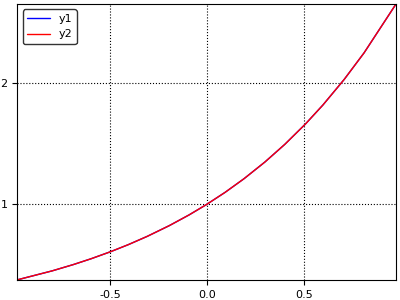

In [113]:
# Aproximação para $h = 1e-4$
h = 1e-4
plot(f, -1, 1, c=:blue)
plot!(x->D(x, h), -1, 1, c=:red)

Essa aproximação parece bastante boa. Vamos ver num intervalo maior.


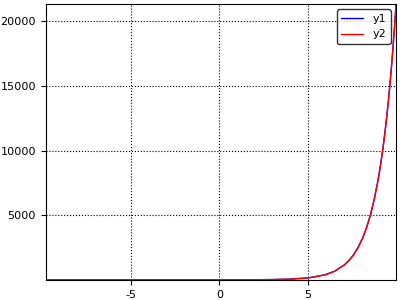

In [114]:
# Aproximação para $h = 1e-4$
h = 1e-4
plot(f, -10, 10, c=:blue)
plot!(x->D(x, h), -10, 10, c=:red)

Vamos ver o erro dessa aproximação.


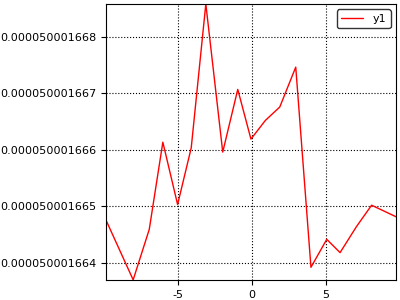

In [115]:
# Aproximação para $h = 1e-4$
h = 1e-4
plot(x->abs(f(x) - D(x, h))/f(x), -10, 10, c=:red)

In [116]:
abs(f(1.0) - D(1.0, 1e-4))/f(1.0)

5.000166739738369e-5

Razoavelmente esperado, o erro está na casa dos $5\times 10^{-5}$. Vamos diminuir o valor de $h$.

In [117]:
(f(1.0) - D(1.0, 1e-5))/f(1.0)

-5.000032568337868e-6

Também esperado, o erro diminui. Vamos tentar um $h$ bem menor.

In [118]:
(f(1.0) - D(1.0, 1e-15))/f(1.0)

-0.1435990324493588

Ora, o erro aumentou bastante. Como você deve suspeitar, isso acontece por causa dos erros de cancelamento.
Vejamos um gráfico do erro em função de $h$.


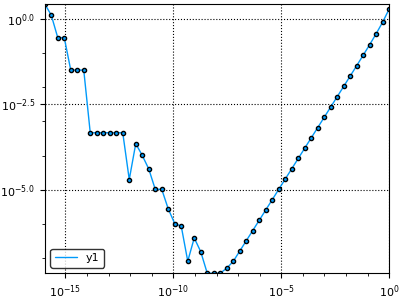

In [119]:
hs = []
Es = []
h = 1.0
x = 1.0
while h > 1e-16
    E = abs(f(x) - D(x, h))
    push!(hs, h)
    push!(Es, E)
    h = h / 2
end
plot(hs, Es, m=3, xaxis=:log, yaxis=:log)

Pelo gráfico podemos ver que o erro diminui até por volta de $10^{-8}$, e depois aumenta, erraticamente.
Vamos tentar descobrir teoricamente o motivo disso.

Vamos usar o Teorema de Taylor com resto para encontrar um limitante para a derivada aproximada.
Veja que expandindo $f(x+h)$ em torno de $x$, temos
$$ f(x + h) = f(x) + f'(x)h + \frac{h^2}{2}f''(\xi), $$
onde $\xi$ é um valor entre $x$ e $h$. Isso quer dizer que
$$ f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2}f''(\xi). $$

Isso nos dá um embasamento teórico de porque o erro diminui inicialmente, e porque é proporcional à $h/2$.
No entanto, lembre-se que computacionalmente não conseguimos calcular $f(x)$ exatamente. Na prática estamos calculando um valor $\overline{f}(x)$ e $\overline{f}(x+h)$, e daí
$$ D_h(x) = \frac{\overline{f}(x+h) - \overline{f}(x)}{h}. $$

Lembre-se da limitação do erro é dada por um valor $\epsilon$ com $|\epsilon| < \epsilon_M$ (da máquina), e portanto vamos usar diretamente $\epsilon_M$ como limitante:
$$ |\overline{f}(x) - f(x)| \leq \epsilon_M |f(x)|, $$
e
$$ |\overline{f}(x+h) - f(x+h)| \leq \epsilon_M |f(x+h)|. $$
Considerando nosso interesse num intervalo $(a,b)$ onde $x$ e $x+h$ residem, podemos limitar $|f(x)|$ por $L_1$ em
todo esse intervalo, de modo que
$$ |\overline{f}(x) - f(x)| \leq \epsilon_M L_1, $$
e
$$ |\overline{f}(x+h) - f(x+h)| \leq \epsilon_M L_1. $$

Logo, o erro de nossa aproximação é
\begin{align}
\mbox{Erro}(h) & = |f'(x) - D_h(x)| \\
& =
\bigg|
    \frac{f(x+h)-f(x)}{h} - \frac{h}{2}f''(\xi) -
    \frac{\overline{f}(x+h)-\overline{f}(x)}{h}
\bigg| \\
& =
\bigg|
    \frac{\overline{f}(x+h)-f(x+h)-\overline{f}(x)+f(x)}{h}
    - \frac{h}{2}f''(\xi)
\bigg| \\
& \leq
    \frac{|\overline{f}(x+h)-f(x+h)| + |\overline{f}(x) - f(x)|}{h}
    + \frac{h}{2}|f''(\xi)| \\
& \leq
    \frac{2\epsilon_M L_1}{h} + \frac{h}{2}L_2,
\end{align}
onde $L_2$ é um limitante para $|f''(x)|$ no intervalo $(a,b)$.

Note que o limitante para o erro depende de $1/h$ além de depender de $h$. Isso quer dizer que a diminuição de $h$ faz o erro crescer bastante, apesar do termo linear dizer que o erro diminui. Felizmente, temos $1/h$ multiplicado por $\epsilon_M$, de modo que esse erro começa relativamente pequeno.

Os problemas comeração quando o erro da esquerda for maior que o da direita, começando de um valor grande de $h$ e tendendo à 0. Nessa direção, o valor da esquerda é crescente, e o da direta é decrescente.
Então, podemos buscar onde eles ficam iguais, e a partir daquele instante saberemos quando o da esquerda fica maior que o da direita.

$$ \frac{2\epsilon_M L1}{h} = \frac{h}{2}L_2
\qquad \Rightarrow \qquad
h = 2\sqrt{\frac{L_1}{L_2}}\sqrt{\epsilon_M}. $$

Os valores de $L_1$ e $L_2$ só podem ser obtidos em casos específicos, pois dependem da função $f$, de sua segunda derivada, do intervalo em questão, e de quão apertado é o limitante obtido. No entanto, é possível ver que existe uma dependência linear com o valor $\sqrt{\epsilon_M}$, que no caso de precisão dupla é $10^{-8}$. Não por acaso, o valor que vimos no gráfico.

Além disso, veja o valor que o limitante obtém quando substituímos esse valor de $h$:
$$ 2\sqrt{\epsilon_M}\sqrt{L_1L_2}. $$
Esse valor também condiz com o valor encontrado no gráfico.

Agora, vamos fazer a mesma análise com a seguinte aproximação para a derivada, chamada de diferença centrada,
$$ f'(x) = \frac{f(x+h) - f(x-h)}{2h} - \frac{h^2}{6}f''(\xi). $$

**Exercício:** Faça a mesma análise que fizemos anteriormente para encontrar um valor ótimo para $h$ que minimize o limitante do erro, e também o valor desse limitante no $h$ ótimo.
Compare seus resultados com o do gráfico abaixo.


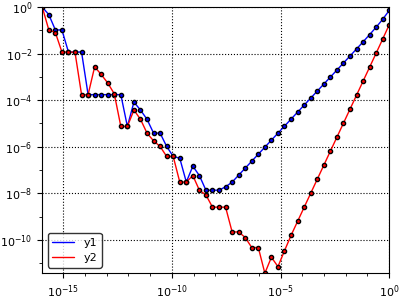

In [120]:
D_av(f, x, h) = (f(x + h) - f(x)) / h
D_ct(f, x, h) = (f(x + h) - f(x - h)) / 2h
hs = []
E_av = []
E_ct = []
E_ct2 = []
h = 1.0
x = 1.0
f(x) = exp(x)
fx = exp(x)
while h > 1e-16
    push!(hs, h)
    E = abs(fx - D_av(f, x, h))/abs(fx)
    push!(E_av, E)
    E = abs(fx - D_ct(f, x, h))/abs(fx)
    push!(E_ct, E)
    h = h /= 2
end
plot(hs, E_av, m=3, xaxis=:log, yaxis=:log, c=:blue)
plot!(hs, E_ct, m=3, xaxis=:log, yaxis=:log, c=:red)

A mesma análise pode ser feita para a segunda derivada, assim como outras. Além disso, existem várias maneiras de se aproximar as derivadas, utilizando mais avaliações da função $f$.

# Exercícios

Faça os exercícios do capítulo 1 do livro Cálculo Numérico de Ruggiero e Lopes.

1. Para cada sequência abaixo, calcule o maior termo que pode ser representado
   por um inteiro de 64 bits sem sinal.

   - $a_n = 2^n$;
   - $a_n = 3n + 5$;
   - $a_n = q a_{n-1}$ onde $q > 1$ e $a_0 = 1$;
   - $a_n = n!$ (use o computador):
   - $a_n = a_{n-1} + a_{n-2}$, com $a_0 = a_1 = 1$.

2. Calcule a expansão de Taylor das seguintes funções, em torno do ponto a dado:

  - $f(x) = x^2 - 5x + 6$, $a = 2$;
  - $g(x) = x^3 - 3x^2 + 3x - 1$, $a = 1$;
  - $h(x) = e^x$, $a = 0$;
  - $z(x) = \ln (x)$, $a = 1$;

3. Sabendo que a primeira e segunda derivadas de $f$ em $x$ existem, calcule os
   seguintes limites.
  (Nota: Para real emoção, não use L'Hôpital).

  - $\displaystyle \lim _ {h \to 0} \dfrac{f(x-h) - f(x)}{h}$;
  - $\displaystyle \lim _ {h \to 0} \dfrac{f(x+h) - f(x-h)}{h}$;
  - $\displaystyle \lim _ {h \to 0} \dfrac{f(x+2h) - 2f(x+h) + f(x)}{h}$;
  - $\displaystyle \lim _ {h \to 0} \dfrac{f(x+h) - 2f(x) + f(x-h)}{h^2}$;
  - $\displaystyle \lim _ {h \to 0} \dfrac{f(x + \alpha h) - f(x - \alpha h)}{h}$, $\alpha \neq 0$.

4. Considere a aproximação para a derivada $D_hf(x) = \dfrac{f(x+h)-f(x)}{h}$.
   Faça o que se pede
  
  - Calcule explicitamente $D_hf$;
  - Calcule a derivada de $f$;
  - Para cada $h$ no conjunto {$10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}$}, faça o gráfico
    de $D_hf(x)$ e de $f'(x)$ na mesma figura.
  - Faça um gráfico do erro absoluto $|D_hf(x) - f'(x)|$ em função de $h$.
    Use escala logarítmica para $h$, e faça-o variar entre $10^{-1}$ e $10^{-16}$.

  Para cada função abaixo,

  - $f(x) = x^2$
  - $f(x) = e^x$
  - $f(x) = \log(x)$

  Repita esta questão para $D_hf(x) = \dfrac{f(x)-f(x-h)}{h}$ e $D_hf(x) = \dfrac{f(x+h)-f(x-h)}{2h}$.
  Compare os resultados obtidos.

4. Faça o que se pede
   - Mostre que $\dfrac{1}{1-x} = 1 + x + x^2 + x^3 + \dots$, se $|x| < 1$;
   - Calcule a derivada de $\arctan(x)$;
   - Utilizando a expansão de Taylor da função encontrada em (b),
    encontre a expansão de Taylor de $\arctan(x)$;
   - Encontre uma série que define $\pi$.

5. Considere as seguintes séries e sequências convergentes:

  - $2 = 1 + \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \dots + \frac{1}{2^n} + \dots$.
  - $a_{n+1} = \frac{a_n}{2} + \frac{1}{a_n}$, com $a_1 = 1$.
  - série para $e$, usando 2.c.
  - $b_{n+1} = \sqrt{b_n + 1}$, com $b_1 = 1$.
  - $\phi_n = \dfrac{F_n}{F_{n-1}}$, onde $F_n$ é o n-ésimo termo de Fibonacci.
  - série para $\pi$ calculada em 4.d.

  Para cada uma delas, faça os seguintes itens

  - Implemente uma função que recebe um número $n$ e calcula a soma parcial $s_n$
    se o item for uma série, ou n-ésimo elemento se o item for uma sequência.
    Faça sua função ser o mais econômica possível e evite overflows.
  - Faça um gráfico do erro pelo número de termos $n$.
  - Dado $\varepsilon > 0$, é possível determinar n de modo que o erro seja menor que $\varepsilon$?
    Veja quantos casos você consegue fazer isso, ou encontrar algum limitante
    desse tipo.

6. Usando a expansão de Taylor de $e^x$,

  - Implemente uma função que recebe $x$ e $n$, e calcule a soma parcial da
    expansão de Taylor até $n$ de $e^x$.
  - Usando a fórmula de erro de Lagrange, calcule um limitante para o erro
    relativo dessa aproximação. Separe nos casos $x > 0$ e $x < 0$.
  - Faça um gráfico do erro relativo no intervalo $[-a,a]$, para valores
    diferentes de $n$ e $a$ e, no mesmo gráfico, desenhe o limitante. Use a função
    `exp` como referência.
    Verifique que para $x < 0$, o erro é maior.
  - Faça uma nova implementação de $e^x$, que recebe $x \geq 0$ e
    um argumento opcional $\varepsilon > 0$ e calcula $e^x$ com erro menor que
    $\varepsilon$.
    Note que você não pode usar a função `exp` aqui, apenas as potências de $x$ e os
    fatoriais.
  - Faça um gráfico do erro relativo no intervalo $[0,a]$, para valores
    diferentes de $\varepsilon$ e $a$ e, no mesmo gráfico, desenhe a reta $y =
    \varepsilon$.
  - Verifique que para alguns valores $x < 0$, o erro relativo da aproximação
    encontrada pelo seu algoritmo não fica limitado por $\varepsilon$. Encontre
    uma maneira de calcular $e^x$ que limite o erro relativo por $\varepsilon$
    tanto para $x < 0$ como para $x > 0$.